In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../input/videogamesales/vgsales.csv" , sep = ",")
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

## EDA (Exploratory Data Analysis)

In [3]:
df.shape

(16598, 11)

In [4]:
df2= df.copy()
df2

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


- Most of the data is numerical almost 63% while the rest are categorical

In [6]:
df_categorical= df.select_dtypes(include='object')
df_categorical.nunique()

Name         11493
Platform        31
Genre           12
Publisher      578
dtype: int64

- Most of the Categorical data have a lot of unique values , will need binning

**Label encoding Categorical variable "Genre"**

In [7]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [8]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
df2['Genre']= label_encoder.fit_transform(df2['Genre'])

In [9]:
df['Name'].value_counts()

Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: Name, Length: 11493, dtype: int64

- Due to the large unique values of Names , it will be dropped 

In [10]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [11]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

**Binning Categorical Variables**

In [12]:
platform_mapping = {
    'PS1': ['PS', 'PS2', 'PS3', 'PS4'],
    'Nintendo': ['DS', 'Wii', 'GBA', 'GC', '3DS', 'N64', 'SNES', 'WiiU', 'NES', 'GB'],
    'Xbox': ['X360', 'XB', 'XOne'],
    'Other': ['PSP', 'PC', 'SAT', '2600', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG', 'PCFX']
}

for index, row in df2.iterrows():
    platform = row['Platform']
    for key, value_list in platform_mapping.items():
        if platform in value_list:
            df2.at[index, 'Platform'] = key
            break
df2['Platform'].value_counts()

Nintendo    6272
PS1         5022
Other       2589
Xbox        2302
PSV          413
Name: Platform, dtype: int64

In [13]:
df2['Platform']= label_encoder.fit_transform(df2['Platform'])
df2['Platform']

0        0
1        0
2        0
3        0
4        0
        ..
16593    0
16594    0
16595    2
16596    0
16597    0
Name: Platform, Length: 16598, dtype: int64

**Analyzing Numerical correlations with Target Variable**

In [14]:
df_numerical = df.select_dtypes(['int64','float64'])
df_numerical.corr()['Global_Sales'].sort_values(ascending= False)

Global_Sales    1.000000
NA_Sales        0.941047
EU_Sales        0.902836
Other_Sales     0.748331
JP_Sales        0.611816
Year           -0.074735
Rank           -0.427407
Name: Global_Sales, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


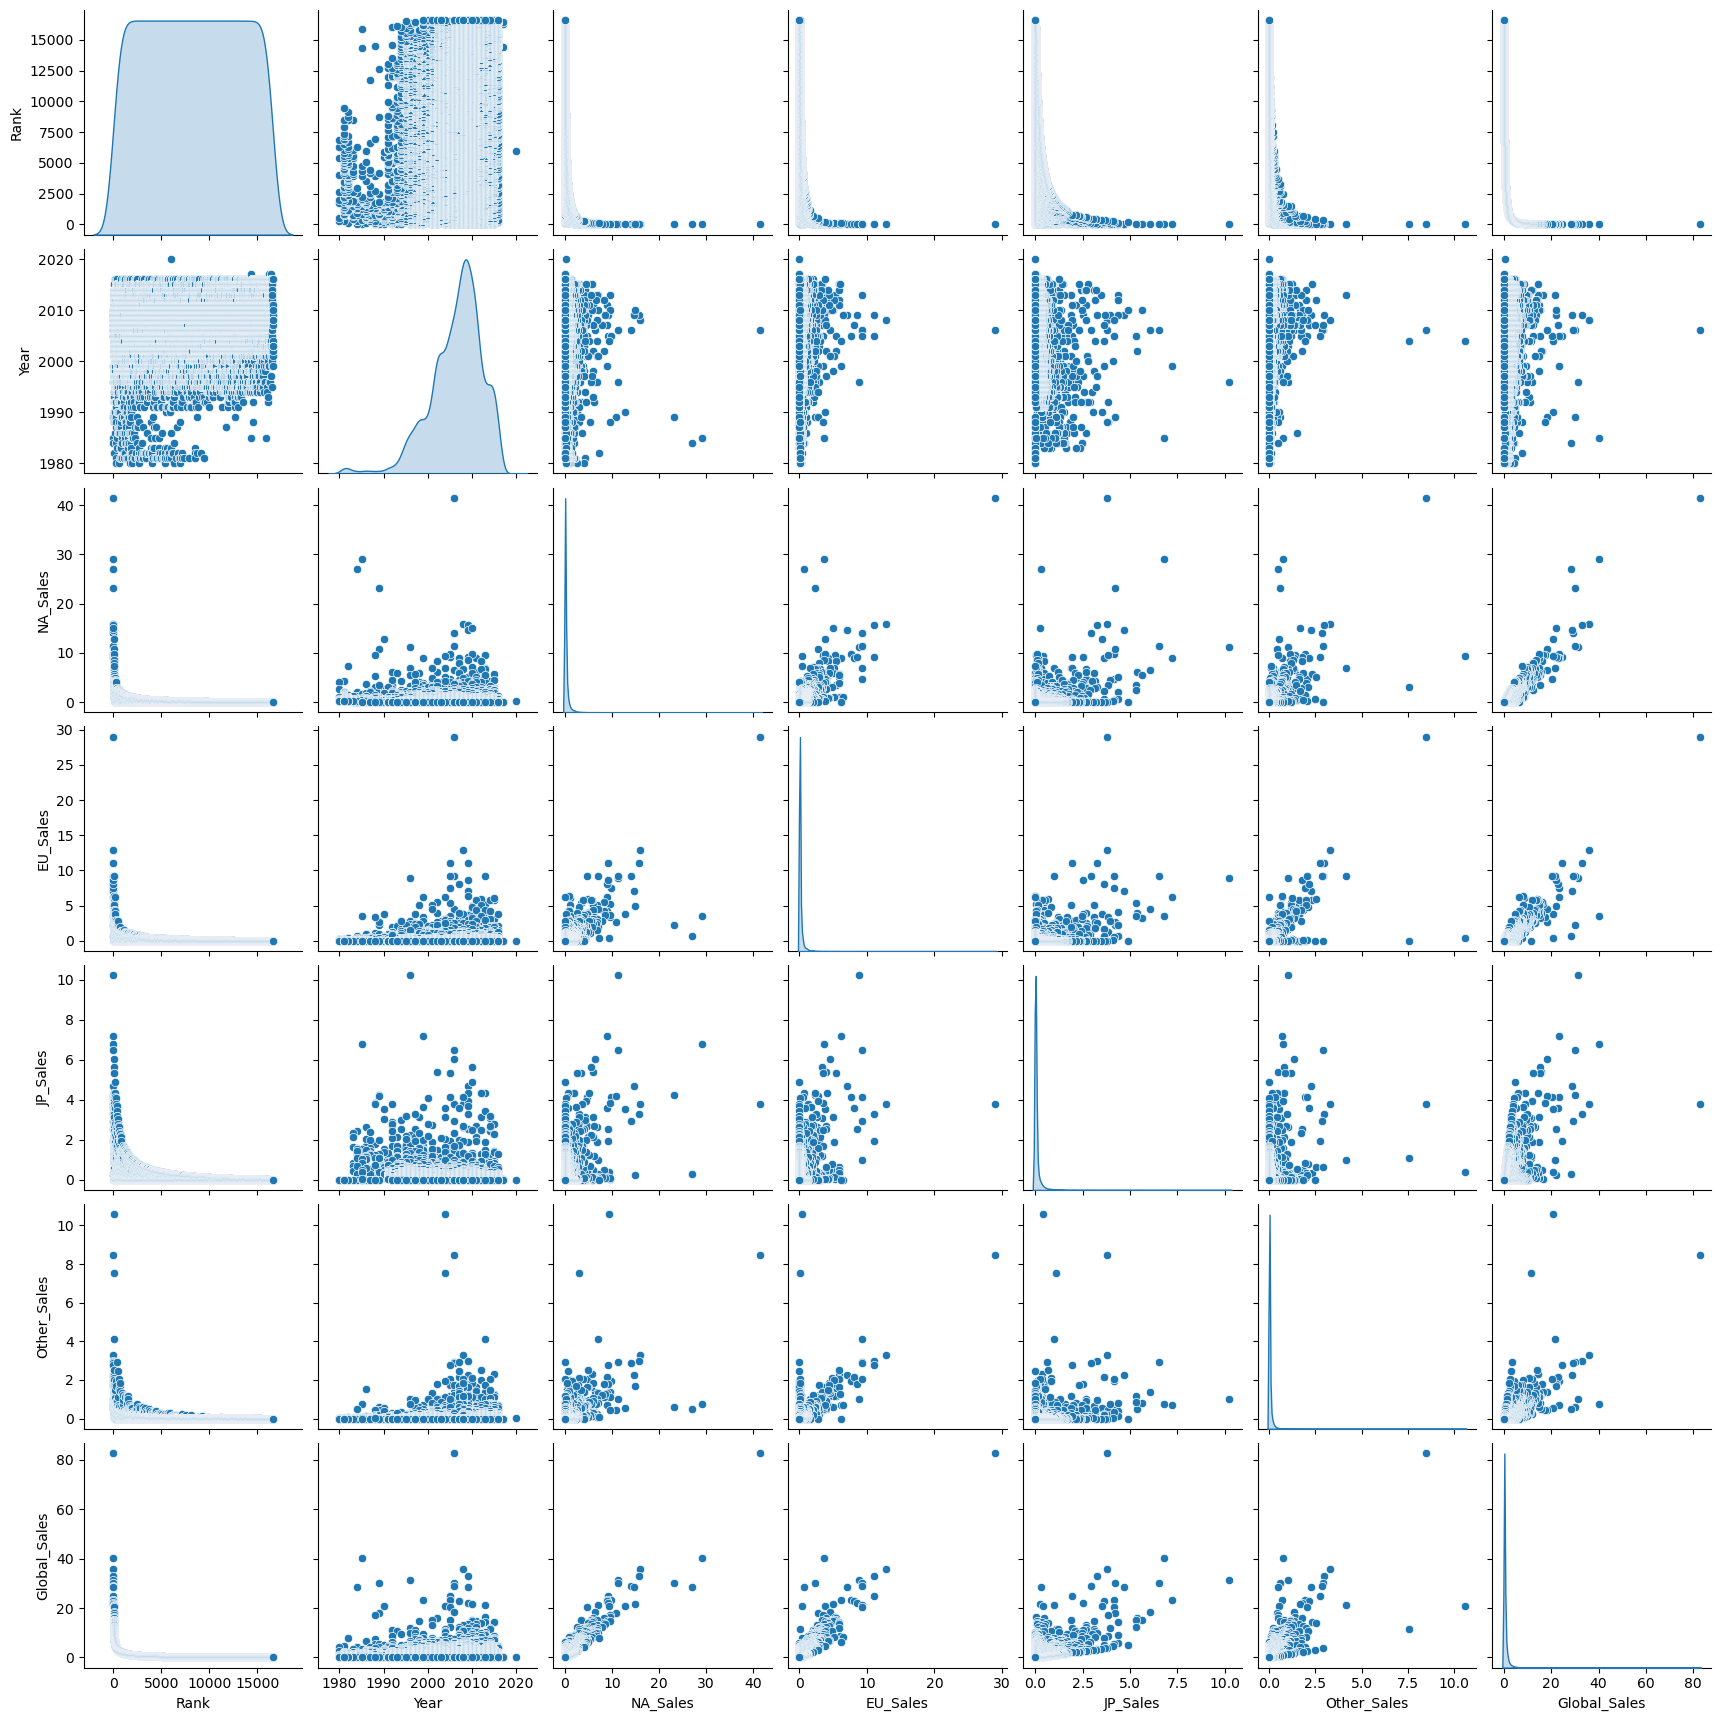

In [15]:
sns.pairplot(df_numerical, diag_kind='kde')

- From the plot and correlation values , it seems that global sales is mainly correlated with NA_Sales ,EU_Sales,Other_Sales, JP_Sales

**Handling Missing Values:**

In [16]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [17]:
df.shape

(16598, 11)

In [18]:
df.isnull().sum()/df.shape[0]*100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

<Axes: >

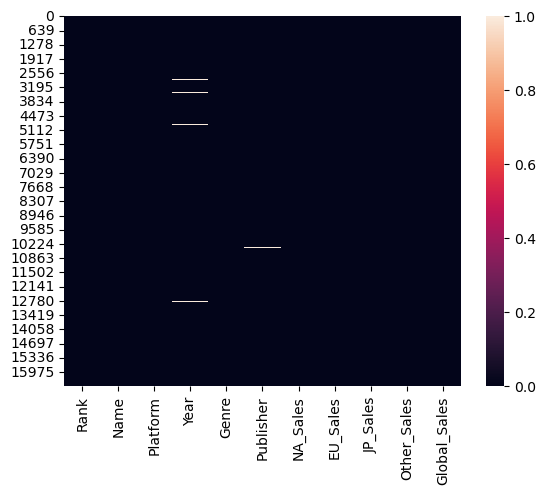

In [19]:
sns.heatmap(df.isnull())

- Dropping Null values in publisher column because they take up to a very small percentage. Hence, dropping them will not affect the distribution of the data

In [20]:
df2.dropna(subset = ['Publisher'], inplace=True,axis=0)

In [21]:
df2.shape
#after

(16540, 11)

In [22]:
df.shape
#after

(16598, 11)

In [23]:
df2.isnull().sum()

Rank              0
Name              0
Platform          0
Year            249
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Text(0, 0.5, 'Count')

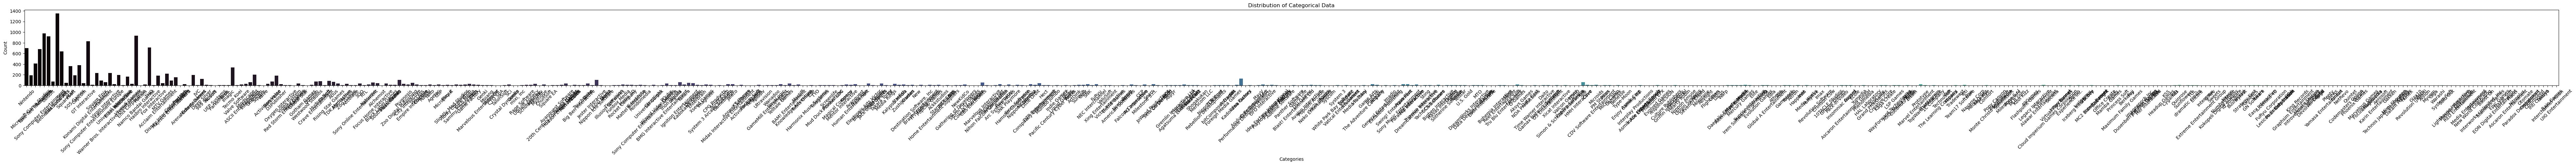

In [24]:
fig = plt.figure(figsize=(100, 3))

sns.countplot(x=df['Publisher'],palette='mako')

plt.title("Distribution of Categorical Data")
plt.xlabel("Categories")
plt.xticks(rotation=45)
plt.ylabel("Count")
#Before

Text(0, 0.5, 'Count')

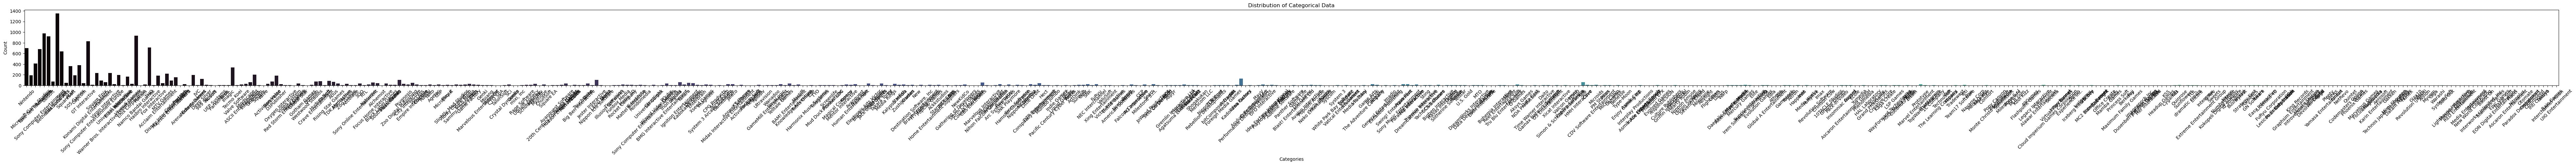

In [25]:
#After
fig = plt.figure(figsize=(100, 3))

sns.countplot(x=df2['Publisher'],palette='mako')

plt.title("Distribution of Categorical Data")
plt.xlabel("Categories")
plt.xticks(rotation=45)
plt.ylabel("Count")

- Distribution is unchanged

In [26]:
df2['Year']= df2['Year'].fillna(method='ffill')

Text(0.5, 1.0, 'KDE Plot after imputing missing values')

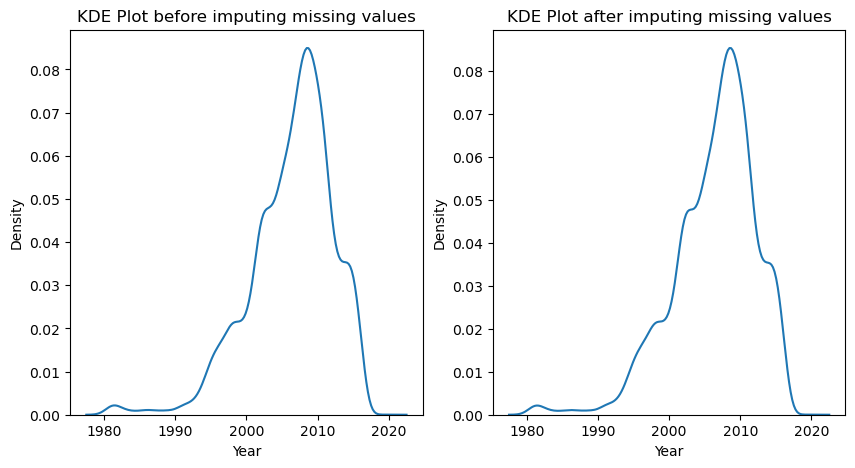

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['Year'], ax = axes[0])
axes[0].set_title("KDE Plot before imputing missing values")
sns.kdeplot(df2['Year'],ax = axes[1])
axes[1].set_title("KDE Plot after imputing missing values")

- Distribution Unchanged

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


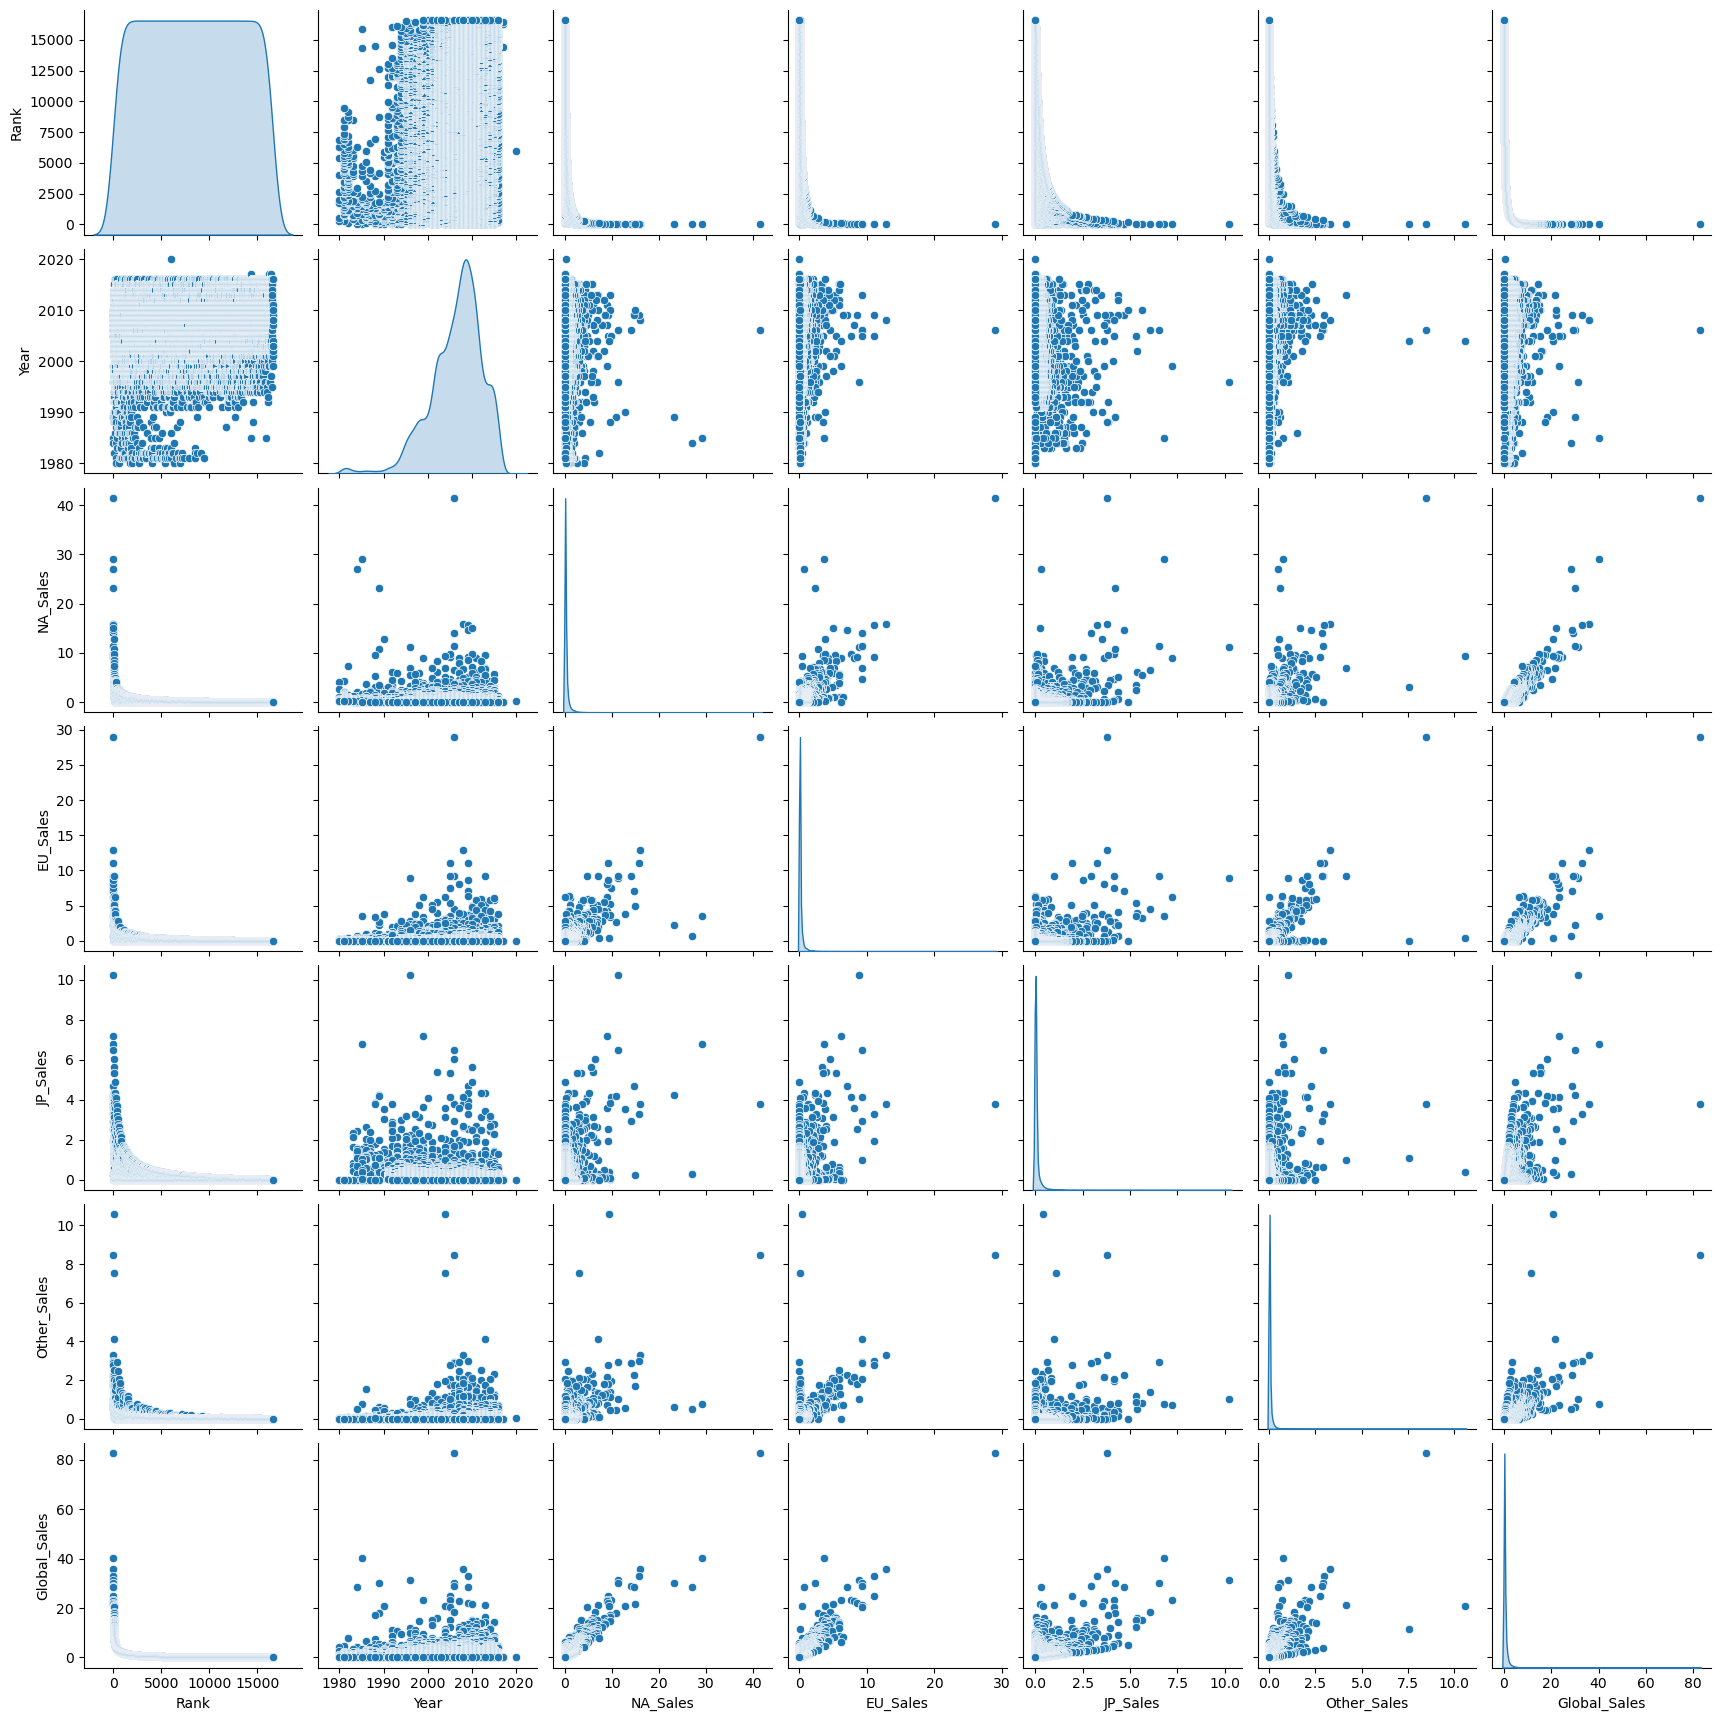

In [28]:
sns.pairplot(df_numerical, diag_kind='kde')

**Handling Outliers** :

Rank               Axes(0.125,0.712609;0.168478x0.167391)
Year            Axes(0.327174,0.712609;0.168478x0.167391)
NA_Sales        Axes(0.529348,0.712609;0.168478x0.167391)
EU_Sales        Axes(0.731522,0.712609;0.168478x0.167391)
JP_Sales           Axes(0.125,0.511739;0.168478x0.167391)
Other_Sales     Axes(0.327174,0.511739;0.168478x0.167391)
Global_Sales    Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

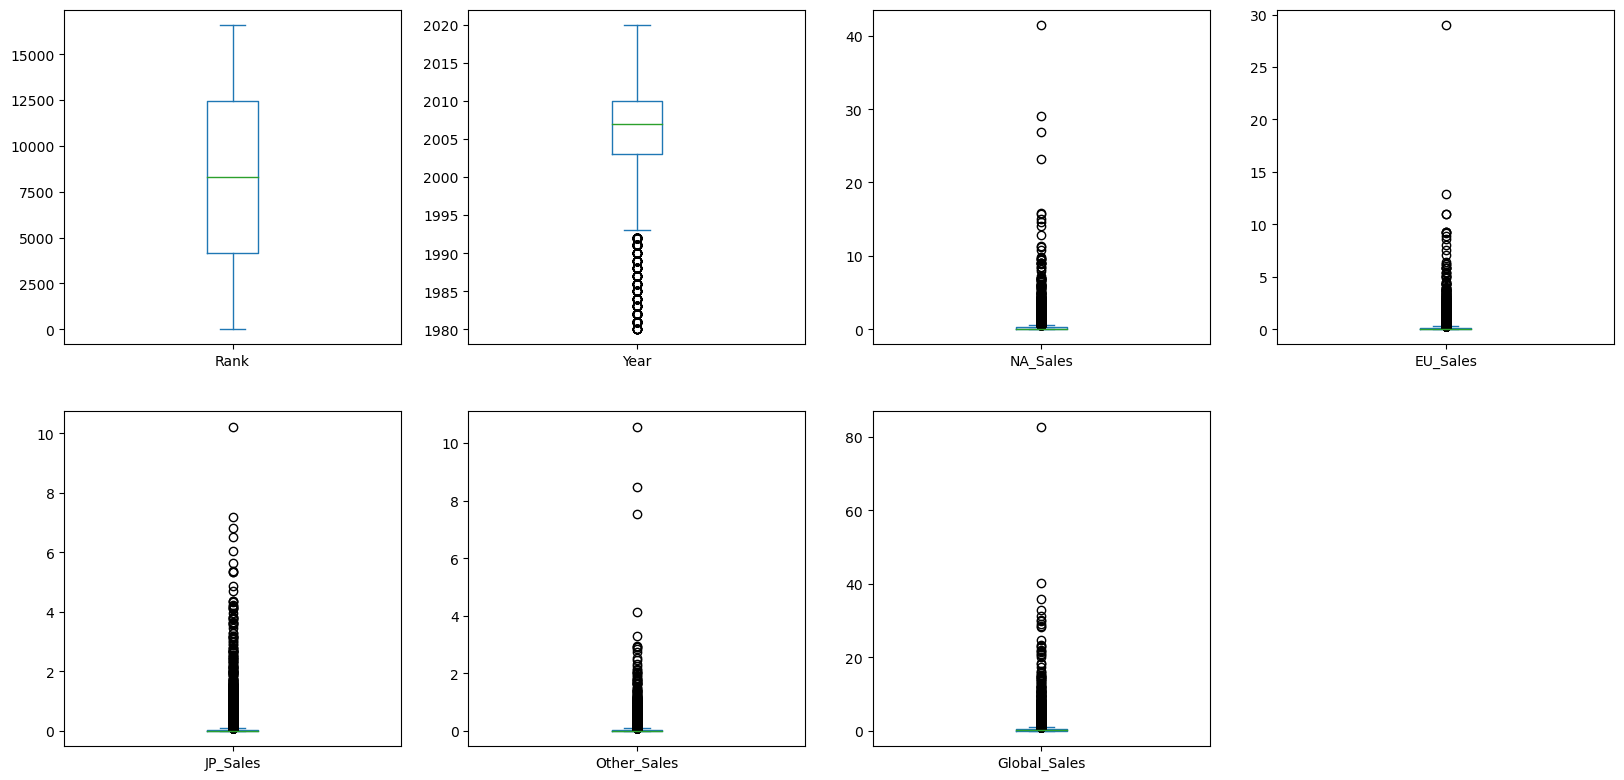

In [29]:
df.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (4,4))

- Scatter plots to detect outliers

In [30]:
df_numerical.columns

Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

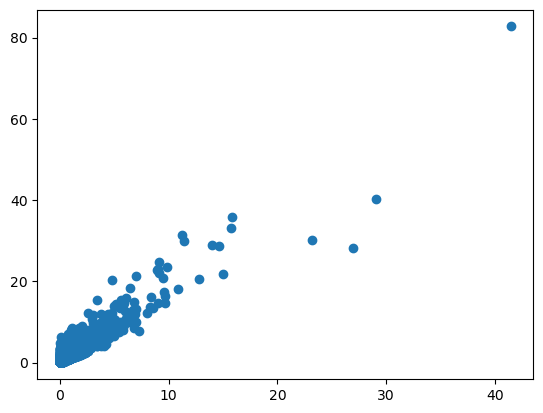

In [31]:
plt.scatter(df['NA_Sales'],df['Global_Sales'])

- Dropping Outliers >25

In [32]:
df2 = df2[df2['NA_Sales'] <= 25]

Text(0.5, 1.0, 'KDE Plot after dropping outlier values')

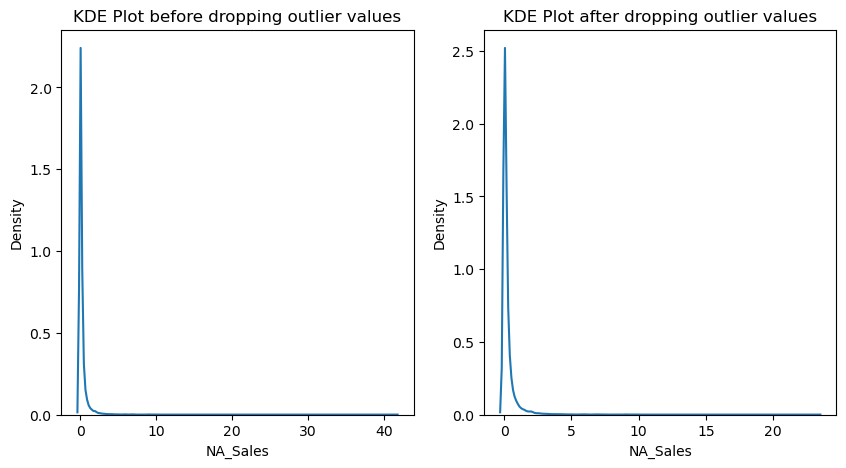

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['NA_Sales'], ax = axes[0])
axes[0].set_title("KDE Plot before dropping outlier values")
sns.kdeplot(df2['NA_Sales'],ax = axes[1])
axes[1].set_title("KDE Plot after dropping outlier values")

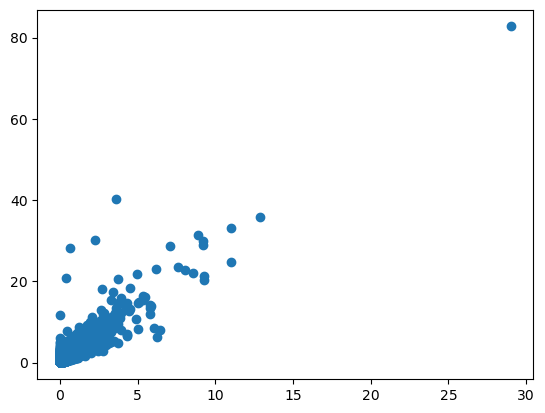

In [34]:
plt.scatter(df['EU_Sales'],df['Global_Sales'])

In [35]:
df2 = df2[df2['EU_Sales'] <= 25]

Text(0.5, 1.0, 'KDE Plot after dropping outlier values')

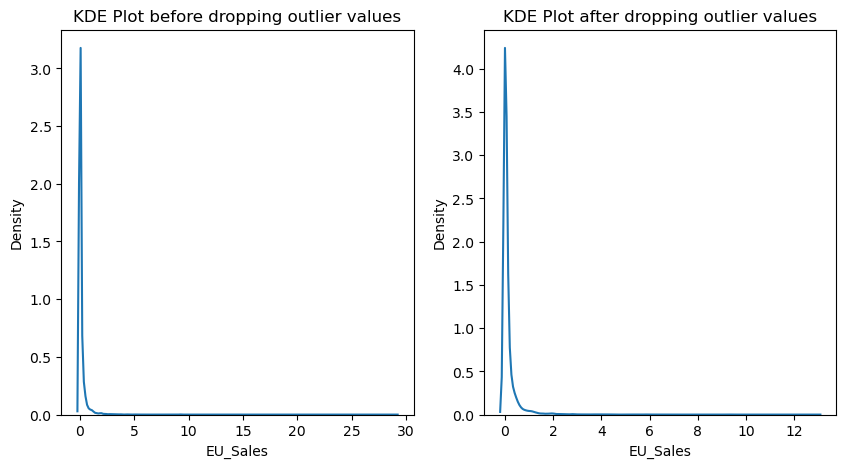

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['EU_Sales'], ax = axes[0])
axes[0].set_title("KDE Plot before dropping outlier values")
sns.kdeplot(df2['EU_Sales'],ax = axes[1])
axes[1].set_title("KDE Plot after dropping outlier values")

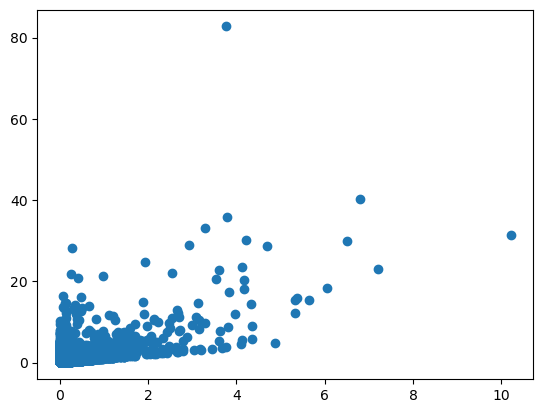

In [37]:
plt.scatter(df['JP_Sales'],df['Global_Sales'])

In [38]:
df2 = df2[df2['JP_Sales'] <= 7]

Text(0.5, 1.0, 'KDE Plot after dropping outlier values')

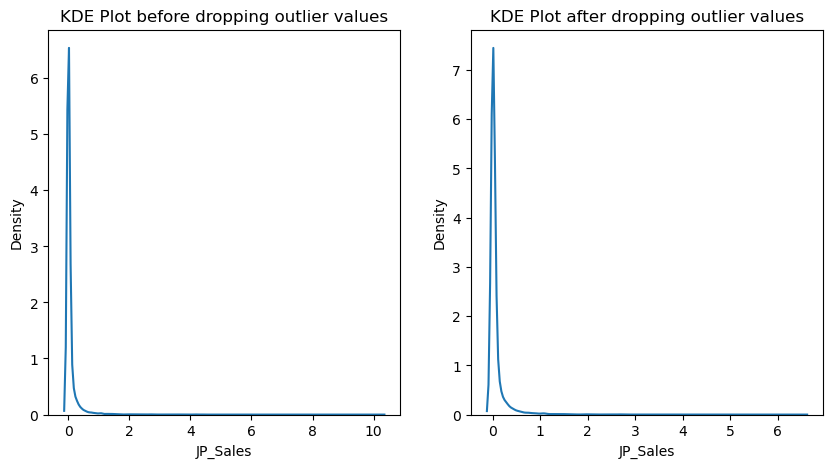

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['JP_Sales'], ax = axes[0])
axes[0].set_title("KDE Plot before dropping outlier values")
sns.kdeplot(df2['JP_Sales'],ax = axes[1])
axes[1].set_title("KDE Plot after dropping outlier values")

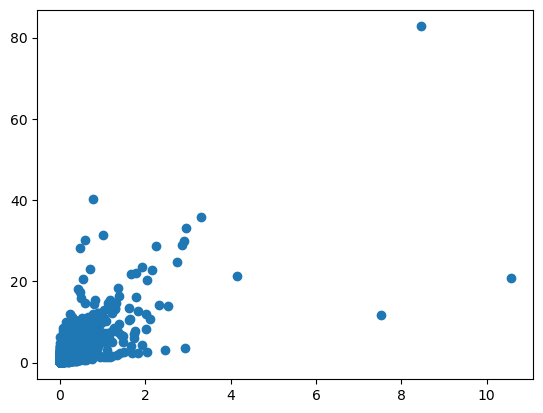

In [40]:
plt.scatter(df['Other_Sales'],df['Global_Sales'])

In [41]:
df2 = df2[df2['Other_Sales'] <= 5]

Text(0.5, 1.0, 'KDE Plot after dropping outlier values')

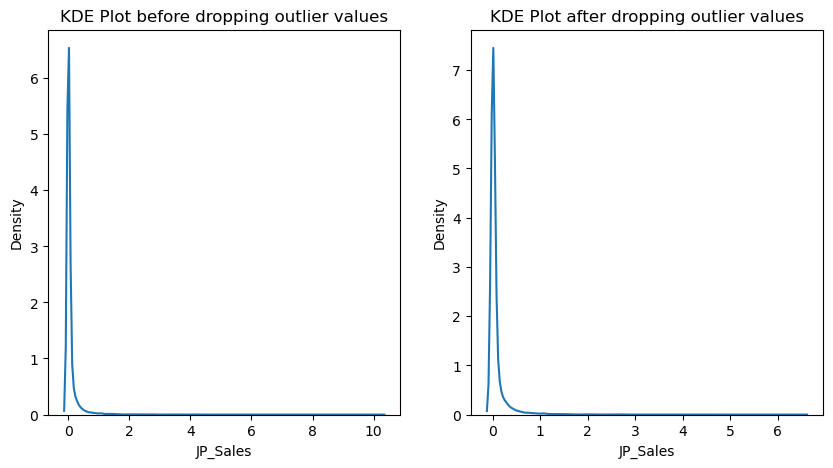

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['JP_Sales'], ax = axes[0])
axes[0].set_title("KDE Plot before dropping outlier values")
sns.kdeplot(df2['JP_Sales'],ax = axes[1])
axes[1].set_title("KDE Plot after dropping outlier values")

In [43]:
df2.drop(['Name'],axis=1,inplace = True)

In [44]:
df2.drop(['Publisher'],axis=1,inplace = True)

## VIF Test

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [46]:
X = df2.drop(columns=['Global_Sales']) 

vif_data = pd.DataFrame()
vif_data["Global_Sales"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

Global_Sales       VIF
0         Rank  5.335032
1     Platform  2.113515
2         Year  9.497189
3        Genre  2.724290
4     NA_Sales  3.063432
5     EU_Sales  4.759993
6     JP_Sales  1.385191
7  Other_Sales  3.652799

## Train - Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x = df2.drop(["Global_Sales"] , axis = 1).values
y = df2["Global_Sales"].values

In [49]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

## Data Scaling using Robust Scaler 

In [50]:
from sklearn.preprocessing import RobustScaler

In [51]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

## Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
df2.columns

Index(['Rank', 'Platform', 'Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales'],
      dtype='object')

In [54]:
lin = LinearRegression()

In [55]:
lin.fit(x_train,y_train)

LinearRegression()

In [56]:
lin.score(x_train,y_train)

0.9999842805156006

In [57]:
lin.score(x_test , y_test)

0.9864023037048167

In [58]:
lin.coef_

array([ 6.58338045e-04, -1.52488587e-04, -6.70669653e-05,  2.17367662e-05,
        2.40001967e-01,  1.10034928e-01,  3.99909704e-02,  3.99713978e-02])

In [59]:
lin.intercept_

0.11029789046984256

In [60]:
y_pred = lin.predict(x_test)
y_pred

array([0.43787614, 0.02072249, 3.91826625, ..., 0.15257726, 2.2884126 ,
       0.03421291])

In [61]:
df3 = pd.DataFrame({"Y_test" : y_test , "Y_predict": y_pred})
df3.head(10)

Y_test  Y_predict
0    0.41   0.437876
1    0.02   0.020722
2    3.70   3.918266
3    0.07   0.066061
4    0.07   0.056287
5    0.28   0.301324
6    0.47   0.491336
7    0.06   0.073868
8    0.15   0.163661
9    0.07   0.079902

In [62]:
from sklearn.metrics import r2_score
reg_score = r2_score(y_test , y_pred)
reg_score

0.9864023037048167

In [63]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [64]:
mse = mean_squared_error(y_test , y_pred)
mse

0.025600059928974562

In [65]:
mape = mean_absolute_percentage_error(y_test , y_pred)
mape

0.1272589645704248

In [66]:
mae = mean_absolute_error(y_test , y_pred)
mae

0.049392099701882096

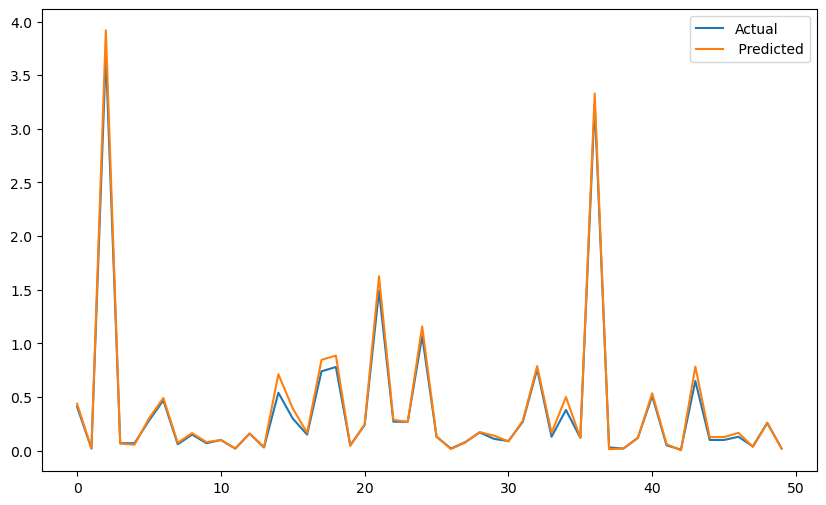

In [67]:
plt.figure(figsize= (10,6))
plt.plot(df3[:50])
plt.legend(["Actual" , " Predicted"])

In [68]:
import statsmodels.api as sm

In [69]:
x2 = sm.add_constant(x)
est = sm.OLS(y , x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.335e+08
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:34:11   Log-Likelihood:                 63455.
No. Observations:               16533   AIC:                        -1.269e+05
Df Residuals:                   16524   BIC:                        -1.268e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0234      0.015      1.582      0.1

In [70]:
print(est2.rsquared_adj)

0.9999845208889819


## Ridg regression

In [71]:
from sklearn.linear_model import RidgeCV

In [72]:
rid = RidgeCV(alphas = 0.5)

In [73]:
rid.fit(x_train,y_train)

RidgeCV(alphas=0.5)

In [74]:
rid.score(x_train,y_train)

0.9999842805034354

In [75]:
rid.score(x_test , y_test)

0.9864023198465108

## Lasso Regression

In [76]:
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [77]:
df2.columns

Index(['Rank', 'Platform', 'Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales'],
      dtype='object')

In [78]:
rid = LassoLars()
scaler = StandardScaler()
y = df2['Global_Sales']
x = df2.drop('Global_Sales', axis=1)

x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [79]:
rid.fit(x_train,y_train)

LassoLars()

In [80]:
rid.score(x_train,y_train)

0.29396338924591614

In [81]:
rid.score(x_test , y_test)

0.2841511387017317